# AWS Movie Recommender (Group 5)

#### Nikki Rastogi

Github Link: https://github.com/nikkirastogi/AWS-Movie-Recommender

Dataset_Link: https://github.com/nikkirastogi/AWS-Movie-Recommender/blob/main/Movie_Data.csv

## Dataset Profiling
Data profiling is the process of examining the data available and collecting statistics and informative summaries about that data. This helps us better understand the quality of data.
### Why you should profile your open data
Data profiling helps our open data program in many ways:

It provides a quantified assessment of data quality.

It assists in the discovery of anomalies within the data.

It helps users understand content, structure, relationship, etc. about the data.

It surfaces issues/problems that we might run into before we start working with the data.

It helps us assess and validate metadata.

### Introduction about Dataset
In the ever-evolving landscape of the film industry and digital streaming platforms, understanding audience preferences and trends is paramount. This analysis delves into the realm of movie ratings to uncover valuable insights that can guide decision-making processes for stakeholders across the entertainment spectrum. By examining patterns in user feedback and ratings data, we aim to provide actionable recommendations that empower producers, OTT platforms, and movie enthusiasts alike.
#### Data Dictionary:

- id: An integer representing the unique identifier for each entry.
- imdb_id: A string representing the IMDb identifier for the movie.
- original_title: A string representing the original title of the movie.
- title: A string representing the title of the movie.
- language: A string representing the language of the movie.
- adult: A boolean indicating whether the movie is suitable for adults.
- budget: An integer representing the budget allocated for the movie.
- release_date: A string representing the release date of the movie.
- popularity: A floating-point number representing the popularity score of the movie.
- revenue: A floating-point number representing the revenue generated by the movie.
- runtime: A floating-point number representing the duration of the movie in minutes.
- status: A string indicating the current status of the movie (e.g., Released, Post Production).
- tagline: A string representing the tagline of the movie.
- vote_average: A floating-point number representing the average rating of the movie.
- vote_count: A floating-point number representing the count of ratings given to the movie.


#### Objective
The objective of this analysis is to leverage movie ratings data to offer strategic recommendations to stakeholders in the film industry. Through comprehensive exploration and analysis, we seek to identify trends, preferences, and emerging opportunities in the movie landscape. By understanding audience sentiments and preferences, our aim is to facilitate informed decision-making for producers, assist OTT platforms in content acquisition, and provide personalized movie recommendations for viewers.

#### Problem Statement
In an era marked by unprecedented content consumption and fierce competition, stakeholders in the film industry face the challenge of navigating a vast sea of data to make impactful decisions. Producers are tasked with creating compelling content that resonates with audiences, while OTT platforms strive to curate diverse libraries that cater to varying tastes. Additionally, movie enthusiasts seek personalized recommendations to discover hidden gems amidst a plethora of options.

This analysis aims to address these challenges by dissecting movie ratings data to uncover actionable insights. By identifying key trends, genres, and audience preferences, we aim to assist decision-makers in optimizing content creation, acquisition strategies, and recommendation algorithms. Ultimately, our goal is to empower stakeholders with the knowledge needed to thrive in the ever-evolving landscape of the film industry.

#### The code block below loads two datasets related to movies and ratings into Pandas DataFrames using pd.read_csv() function with specific URL paths.This code snippet succinctly loads two datasets into DataFrames (df, ratings_df, and user_df) by directly reading CSV files from specific URLs hosted on GitHub.


In [1]:
#Import all libraries that will be used
import pandas as pd
import numpy as np

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#load the movies and ratings file into the dataframe
movies_ratings_df = pd.read_csv('https://raw.githubusercontent.com/nikkirastogi/AWS-Movie-Recommender/main/Movie_Data.csv')

In [4]:
movies_ratings_df.head()

adult    budget     id    imdb_id original_language  \
0  False  30000000    862  tt0114709                en   
1  False  65000000   8844  tt0113497                en   
2  False         0  15602  tt0113228                en   
3  False  16000000  31357  tt0114885                en   
4  False         0  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  popularity release_date  \
0  Led by Woody, Andy's toys live happily in his ...   21.946943   30-10-1995   
1  When siblings Judy and Peter discover an encha...   17.015539   15-12-1995   
2  A family wedding reignites the ancient feud be...   11.712900   22-12-1995   
3  Cheated on, mistreated and stepped on, the wom...    3.859495   22-12-1995   
4  Just when George Banks has recovered from his ...    8.387519   10-02-1995   

       revenue  runtime    status  \
0  373554033.0     81.0  Released   
1  262797249.0    104.0  Released   
2          0.0    101.0  Released   
3   81452156.0    127.0  Released   
4   76578911.0    106.0  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  vote_average  vote_count  
0                    Toy Story           7.7      5415.0  
1                      Jumanji           6.9      2413.0  
2             Grumpier Old Men           6.5        92.0  
3            Waiting to Exhale           6.1        34.0  
4  Father of the Bride Part II           5.7       173.0

Dataset columns are jumbled thats why it is little bit difficult to read.
Next Step, I will perform Data Preprocessing.

### DATA PREPROCESSING

Data processing occurs when data is collected and translated into usable information.
It is important for data processing to be done correctly as not to negatively affect the analysis.

Initially, I will rearrange the columns,
then delete some columns which will not help in analysis.
After that rename some column as per easy to understand.

In [5]:
movies_ratings_df = movies_ratings_df[['id','imdb_id','original_title','title','original_language','adult','overview','budget','release_date','popularity','revenue','runtime','status','tagline','vote_average','vote_count']]
movies_ratings_df


id    imdb_id               original_title  \
0         862  tt0114709                    Toy Story   
1        8844  tt0113497                      Jumanji   
2       15602  tt0113228             Grumpier Old Men   
3       31357  tt0114885            Waiting to Exhale   
4       11862  tt0113041  Father of the Bride Part II   
...       ...        ...                          ...   
32264  222848  tt0112613              Caged Heat 3000   
32265   30840  tt0102797                   Robin Hood   
32266   67758  tt0303758                     Betrayal   
32267  227506  tt0008536          Satana likuyushchiy   
32268  461257  tt6980792                     Queerama   

                             title original_language  adult  \
0                        Toy Story                en  False   
1                          Jumanji                en  False   
2                 Grumpier Old Men                en  False   
3                Waiting to Exhale                en  False   
4      Father of the Bride Part II                en  False   
...                            ...               ...    ...   
32264              Caged Heat 3000                en  False   
32265                   Robin Hood                en  False   
32266                     Betrayal                en  False   
32267             Satan Triumphant                en  False   
32268                     Queerama                en  False   

                                                overview    budget  \
0      Led by Woody, Andy's toys live happily in his ...  30000000   
1      When siblings Judy and Peter discover an encha...  65000000   
2      A family wedding reignites the ancient feud be...         0   
3      Cheated on, mistreated and stepped on, the wom...  16000000   
4      Just when George Banks has recovered from his ...         0   
...                                                  ...       ...   
32264  It's the year 3000 AD. The world's most danger...         0   
32265  Yet another version of the classic epic, with ...         0   
32266  When one of her hits goes wrong, a professiona...         0   
32267  In a small town live two brothers, one a minis...         0   
32268  50 years after decriminalisation of homosexual...         0   

      release_date  popularity      revenue  runtime    status  \
0       30-10-1995   21.946943  373554033.0     81.0  Released   
1       15-12-1995   17.015539  262797249.0    104.0  Released   
2       22-12-1995   11.712900          0.0    101.0  Released   
3       22-12-1995    3.859495   81452156.0    127.0  Released   
4       10-02-1995    8.387519   76578911.0    106.0  Released   
...            ...         ...          ...      ...       ...   
32264   01-01-1995    0.661558          0.0     85.0  Released   
32265   13-05-1991    5.683753          0.0    104.0  Released   
32266   01-08-2003    0.903007          0.0     90.0  Released   
32267   21-10-1917    0.003503          0.0     87.0  Released   
32268   09-06-2017    0.163015          0.0     75.0  Released   

                                                 tagline  vote_average  \
0                                                    NaN           7.7   
1              Roll the dice and unleash the excitement!           6.9   
2      Still Yelling. Still Fighting. Still Ready for...           6.5   
3      Friends are the people who let you be yourself...           6.1   
4      Just When His World Is Back To Normal... He's ...           5.7   
...                                                  ...           ...   
32264                                                NaN           3.5   
32265                                                NaN           5.7   
32266                             A deadly game of wits.           3.8   
32267                                                NaN           0.0   
32268                                                NaN           0.0   

       vote_count  
0          5415.0  
1     

In [6]:
movies_ratings_df.shape


(32269, 16)

In [7]:
movies_ratings_df['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [8]:
column_to_drop = ['original_title','overview']
movies_ratings_df = movies_ratings_df.drop(columns = column_to_drop)

In [9]:
movies_ratings_df

id    imdb_id                        title original_language  \
0         862  tt0114709                    Toy Story                en   
1        8844  tt0113497                      Jumanji                en   
2       15602  tt0113228             Grumpier Old Men                en   
3       31357  tt0114885            Waiting to Exhale                en   
4       11862  tt0113041  Father of the Bride Part II                en   
...       ...        ...                          ...               ...   
32264  222848  tt0112613              Caged Heat 3000                en   
32265   30840  tt0102797                   Robin Hood                en   
32266   67758  tt0303758                     Betrayal                en   
32267  227506  tt0008536             Satan Triumphant                en   
32268  461257  tt6980792                     Queerama                en   

       adult    budget release_date  popularity      revenue  runtime  \
0      False  30000000   30-10-1995   21.946943  373554033.0     81.0   
1      False  65000000   15-12-1995   17.015539  262797249.0    104.0   
2      False         0   22-12-1995   11.712900          0.0    101.0   
3      False  16000000   22-12-1995    3.859495   81452156.0    127.0   
4      False         0   10-02-1995    8.387519   76578911.0    106.0   
...      ...       ...          ...         ...          ...      ...   
32264  False         0   01-01-1995    0.661558          0.0     85.0   
32265  False         0   13-05-1991    5.683753          0.0    104.0   
32266  False         0   01-08-2003    0.903007          0.0     90.0   
32267  False         0   21-10-1917    0.003503          0.0     87.0   
32268  False         0   09-06-2017    0.163015          0.0     75.0   

         status                                            tagline  \
0      Released                                                NaN   
1      Released          Roll the dice and unleash the excitement!   
2      Released  Still Yelling. Still Fighting. Still Ready for...   
3      Released  Friends are the people who let you be yourself...   
4      Released  Just When His World Is Back To Normal... He's ...   
...         ...                                                ...   
32264  Released                                                NaN   
32265  Released                                                NaN   
32266  Released                             A deadly game of wits.   
32267  Released                                                NaN   
32268  Released                                                NaN   

       vote_average  vote_count  
0               7.7      5415.0  
1               6.9      2413.0  
2               6.5        92.0  
3               6.1        34.0  
4               5.7       173.0  
...             ...         ...  
32264           3.5         1.0  
32265           5.7        26.0  
32266           3.8         6.0  
32267           0.0         0.0  
32268           0.0         0.0  

[32269 rows x 14 columns]

In [10]:
movies_ratings_df.shape

(32269, 14)

In [11]:
# Define the mapping of old column names to new column names
column_name_mapping = {'original_language':'language','vote_average': 'average_rating', 'vote_count': 'rating_count'}

# Rename the columns
movies_ratings_df = movies_ratings_df.rename(columns=column_name_mapping)

In [12]:
movies_ratings_df

id    imdb_id                        title language  adult  \
0         862  tt0114709                    Toy Story       en  False   
1        8844  tt0113497                      Jumanji       en  False   
2       15602  tt0113228             Grumpier Old Men       en  False   
3       31357  tt0114885            Waiting to Exhale       en  False   
4       11862  tt0113041  Father of the Bride Part II       en  False   
...       ...        ...                          ...      ...    ...   
32264  222848  tt0112613              Caged Heat 3000       en  False   
32265   30840  tt0102797                   Robin Hood       en  False   
32266   67758  tt0303758                     Betrayal       en  False   
32267  227506  tt0008536             Satan Triumphant       en  False   
32268  461257  tt6980792                     Queerama       en  False   

         budget release_date  popularity      revenue  runtime    status  \
0      30000000   30-10-1995   21.946943  373554033.0     81.0  Released   
1      65000000   15-12-1995   17.015539  262797249.0    104.0  Released   
2             0   22-12-1995   11.712900          0.0    101.0  Released   
3      16000000   22-12-1995    3.859495   81452156.0    127.0  Released   
4             0   10-02-1995    8.387519   76578911.0    106.0  Released   
...         ...          ...         ...          ...      ...       ...   
32264         0   01-01-1995    0.661558          0.0     85.0  Released   
32265         0   13-05-1991    5.683753          0.0    104.0  Released   
32266         0   01-08-2003    0.903007          0.0     90.0  Released   
32267         0   21-10-1917    0.003503          0.0     87.0  Released   
32268         0   09-06-2017    0.163015          0.0     75.0  Released   

                                                 tagline  average_rating  \
0                                                    NaN             7.7   
1              Roll the dice and unleash the excitement!             6.9   
2      Still Yelling. Still Fighting. Still Ready for...             6.5   
3      Friends are the people who let you be yourself...             6.1   
4      Just When His World Is Back To Normal... He's ...             5.7   
...                                                  ...             ...   
32264                                                NaN             3.5   
32265                                                NaN             5.7   
32266                             A deadly game of wits.             3.8   
32267                                                NaN             0.0   
32268                                                NaN             0.0   

       rating_count  
0            5415.0  
1            2413.0  
2              92.0  
3              34.0  
4             173.0  
...             ...  
32264           1.0  
32265          26.0  
32266           6.0  
32267           0.0  
32268           0.0  

[32269 rows x 14 columns]

### Data Summary
In this dataset, 8 numerical and 6 categorical Varibles are there.

In [13]:
movies_ratings_df.dtypes

id                  int64
imdb_id            object
title              object
language           object
adult                bool
budget              int64
release_date       object
popularity        float64
revenue           float64
runtime           float64
status             object
tagline            object
average_rating    float64
rating_count      float64
dtype: object

In [14]:
movies_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32269 entries, 0 to 32268
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              32269 non-null  int64  
 1   imdb_id         32256 non-null  object 
 2   title           32267 non-null  object 
 3   language        32269 non-null  object 
 4   adult           32269 non-null  bool   
 5   budget          32269 non-null  int64  
 6   release_date    32202 non-null  object 
 7   popularity      32267 non-null  float64
 8   revenue         32267 non-null  float64
 9   runtime         32261 non-null  float64
 10  status          32199 non-null  object 
 11  tagline         17933 non-null  object 
 12  average_rating  32267 non-null  float64
 13  rating_count    32267 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(6)
memory usage: 3.2+ MB


In [15]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in movies_ratings_df.columns:
        print(column_name, ": ", get_var_category(movies_ratings_df[column_name]))

In [16]:
print_categories(movies_ratings_df)

id :  Numerical
imdb_id :  Categorical
title :  Categorical
language :  Categorical
adult :  Numerical
budget :  Numerical
release_date :  Categorical
popularity :  Numerical
revenue :  Numerical
runtime :  Numerical
status :  Categorical
tagline :  Categorical
average_rating :  Numerical
rating_count :  Numerical


In [17]:
movies_ratings_df.shape

(32269, 14)

In [47]:
holder = [] #record holder
# loop through non numerical columns
for I in movies_ratings_df.select_dtypes(exclude =['int64','float64']).columns:
    rec = [] # initialize empty list
    rec.append(I) #column name
    rec.append(movies_ratings_df[I].nunique()) # numer of unique values
    rec.append(movies_ratings_df[I].value_counts().index[0]) #modal value
    rec.append(movies_ratings_df[I].value_counts()[0]) # count of modal value
    holder.append(rec) #add record to larger array
    
#list to data frame
columns = ['Column','number of unique values','most popular column','count']    
 
df_new = pd.DataFrame(data=holder,columns=columns)
df_new

Column  number of unique values     most popular column  count
0       imdb_id                    32238               tt0084387      2
1         title                    30354              Cinderella      8
2      language                        1                      en  32269
3         adult                        2                   False  32264
4  release_date                    14397              01-01-2009    110
5        status                        6                Released  31952
6       tagline                    17828  Based on a true story.      6

In [51]:
numerical_col= []
# loop through non numerical columns
for I in movies_ratings_df.select_dtypes(include =['int64','float64']).columns:
    rec = [] # initialize empty list
    rec.append(I) #column name
    rec.append(movies_ratings_df[I].mean()) # find mean
    rec.append(movies_ratings_df[I].std()) # find standard deviation

    numerical_col.append(rec) #add record to larger array
    
#list to data frame
columns = ['Column Name','mean','std_div']    
 
numerical_df = pd.DataFrame(data=numerical_col,columns=columns)
numerical_df

Column Name          mean       std_div
0              id  1.042947e+05  1.111771e+05
1          budget  5.609529e+06  2.030109e+07
2      popularity  3.368411e+00  6.878774e+00
3         revenue  1.517192e+07  7.557805e+07
4         runtime  9.313871e+01  3.711575e+01
5  average_rating  5.491171e+00  1.941068e+00
6    rating_count  1.415664e+02  5.745851e+02

### Descriptive Statistics

In [18]:
length = len(movies_ratings_df["popularity"])
print(length)

32269


In [19]:
count = movies_ratings_df["popularity"].count()
print(count)

32267


In [20]:
number_of_missing_values = length - count
pct_of_missing_values = float(number_of_missing_values / length)
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

0.0%


In [21]:
print("Minimum value: ", movies_ratings_df["popularity"].min())
print("Maximum value: ", movies_ratings_df["popularity"].max())

Minimum value:  0.0
Maximum value:  547.488298


### Mean, Mode and Median

In [22]:
movies_ratings_df["popularity"].mean()

3.3684114344996443

In [23]:
movies_ratings_df["popularity"].mode()

0    0.0
Name: popularity, dtype: float64

In [24]:
movies_ratings_df["popularity"].median()

1.254364

In [26]:
movies_ratings_df["popularity"].std()

6.878773919891441

In [27]:
quantile = movies_ratings_df["popularity"].quantile([.25, .5, .75])
quantile

0.25    0.409172
0.50    1.254364
0.75    4.817934
Name: popularity, dtype: float64

### Distribution Plots

#### Does the status of a movie during its production cycle influence its popularity among audiences?

This research question aims to investigate whether there is a correlation between the status of a movie (such as Released, Post Production, etc.) and its average popularity. By analyzing the average popularity of movies grouped by their status, we can gain insights into whether certain stages of a movie's production cycle tend to generate more interest and engagement from audiences.

The y-axis shows average popularity, while the x-axis shows the different stages a movie or TV show can be in, from canceled to rumored.
The most popular status is “Released”, with an average popularity of 3.0.
The least popular statuses are “Canceled” and “Rumored”, both with an average popularity of 2.0.

There is a generally positive correlation between the stage a movie or TV show is in and its average popularity. This means that movies and TV shows tend to become more popular as they progress through the production process.

In [34]:
movies_ratings_df["status"].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

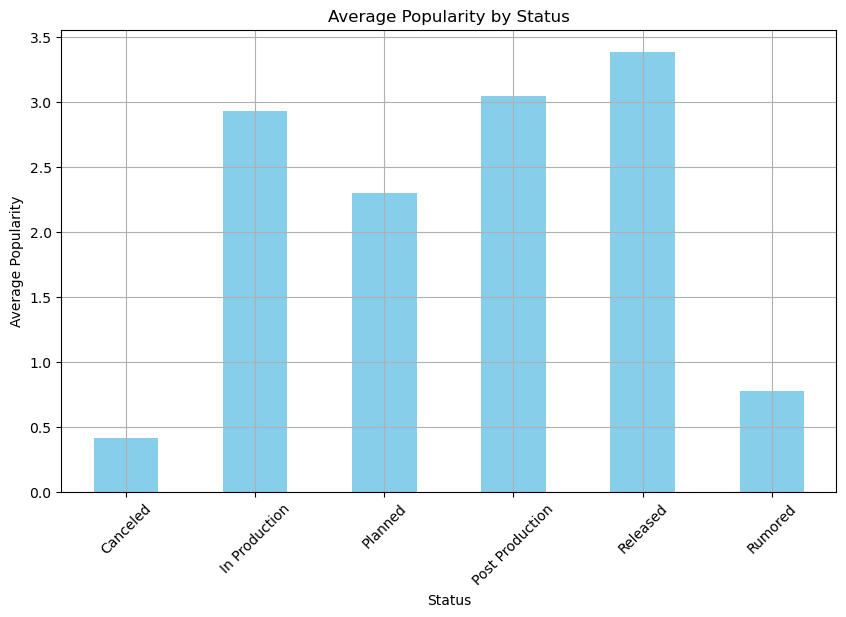

In [35]:
import matplotlib.pyplot as plt

# Group the data by 'status' and calculate the mean popularity for each status
status_popularity_mean = movies_ratings_df.groupby('status')['popularity'].mean()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
status_popularity_mean.plot(kind='bar', color='skyblue')
plt.title('Average Popularity by Status')
plt.xlabel('Status')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [33]:
movies_ratings_df[["popularity", "average_rating","runtime"]].corr()

popularity  average_rating   runtime
popularity        1.000000        0.169223  0.145472
average_rating    0.169223        1.000000  0.147521
runtime           0.145472        0.147521  1.000000

obervation: correlation is very less so all three columns are not related to each other.

In [30]:
movies_ratings_df[["language", "status"]].describe()

language    status
count     32269     32199
unique        1         6
top          en  Released
freq      32269     31952

### How does the popularity of a movie correlate with its average rating?

Below graphs will help visualize the relationship between popularity and average rating.
Most of popular movie have rating above average.
Most of movies popularity lies under 100.

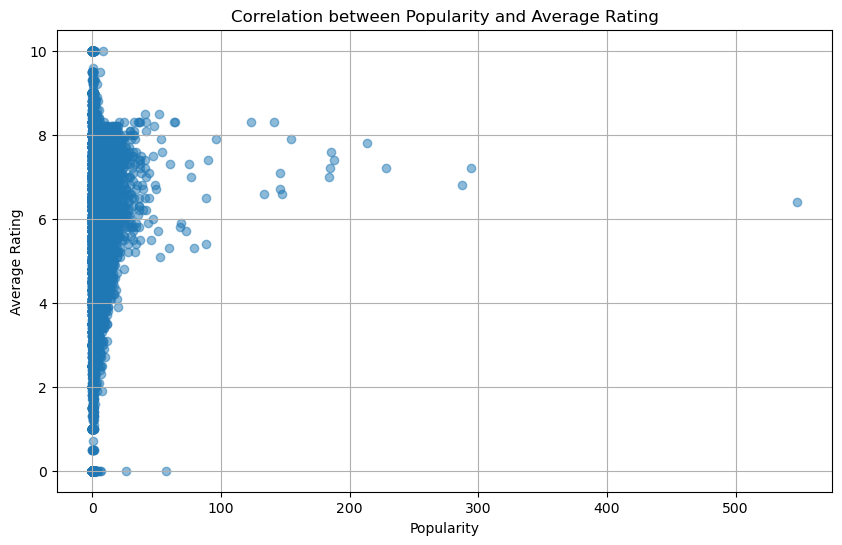

In [39]:
# Plotting the correlation between popularity and average rating
plt.figure(figsize=(10, 6))
plt.scatter(movies_ratings_df['popularity'], movies_ratings_df['average_rating'], alpha=0.5)
plt.title('Correlation between Popularity and Average Rating')
plt.xlabel('Popularity')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


### How does average rating distributed across movies?

Text(0.5, 1.0, 'Histogram For Movie Rating')

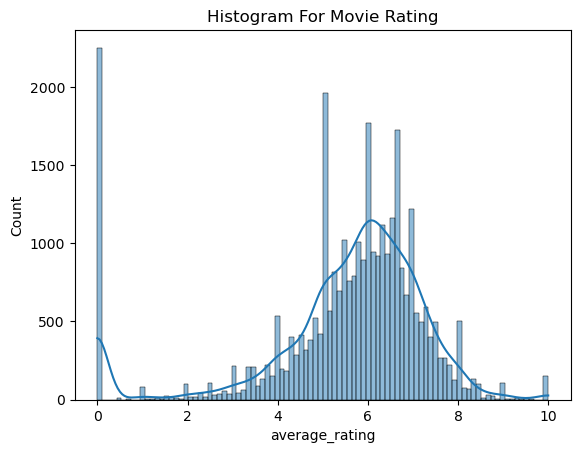

In [44]:
import seaborn as sns
#Defining histogram for Numerical Variable
sns.histplot(data = movies_ratings_df, x = 'average_rating',kde = True)
plt.title('Histogram For Movie Rating')

## Profiling Libraries

There is libraries that exist that perform all of the data crunching for you. They output a very clear profile of your data. pandas-profiling is one of them. That library offers out-of-the-box statistical profiling of your dataset. Since the dataset we are using is tidy and standardized, we can use the library right away on our dataset.




In [32]:
import ydata_profiling 

ydata_profiling.ProfileReport(movies_ratings_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Part II: Set-up S3 bucket and upload dataset into the S3 bucket

In [1]:
pip install awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 36.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.76
    Uninstalling botocore-1.29.76:
      Successfully uninstalled botocore-1.29.76
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.5.0 requires botocore<1.29.77,>=1.29.76, but you have botocore 1.34.41 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade aiobotocore

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 932.3 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 6.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.29.76
    Uninstalling botocore-1.29.76:
      Successfully uninstalled botocore-1.29.76
  Attempting uninstall: aiobotocore
    Found existing installation: aiobotocore 2.5.0
    Uninstalling aiobotocore-2.5.0:
      Successfully uninstalled aiobotocore-2.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.32.41 requires botocore==1.34.41, but you have botocore 1.34.34 which is incompatible.
s3fs 2023.4.0 requires aiobotocore~=2.5.0, but you have aiobotocore 2.11.2 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install s3fs

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import s3fs

file = 's3://nikki-rastogi/Movie_Data.csv'
movie_ratings_df = pd.read_csv(file)
movie_ratings_df

adult    budget      id    imdb_id original_language  \
0      False  30000000     862  tt0114709                en   
1      False  65000000    8844  tt0113497                en   
2      False         0   15602  tt0113228                en   
3      False  16000000   31357  tt0114885                en   
4      False         0   11862  tt0113041                en   
...      ...       ...     ...        ...               ...   
32264  False         0  222848  tt0112613                en   
32265  False         0   30840  tt0102797                en   
32266  False         0   67758  tt0303758                en   
32267  False         0  227506  tt0008536                en   
32268  False         0  461257  tt6980792                en   

                    original_title  \
0                        Toy Story   
1                          Jumanji   
2                 Grumpier Old Men   
3                Waiting to Exhale   
4      Father of the Bride Part II   
...                            ...   
32264              Caged Heat 3000   
32265                   Robin Hood   
32266                     Betrayal   
32267          Satana likuyushchiy   
32268                     Queerama   

                                                overview  popularity  \
0      Led by Woody, Andy's toys live happily in his ...   21.946943   
1      When siblings Judy and Peter discover an encha...   17.015539   
2      A family wedding reignites the ancient feud be...   11.712900   
3      Cheated on, mistreated and stepped on, the wom...    3.859495   
4      Just when George Banks has recovered from his ...    8.387519   
...                                                  ...         ...   
32264  It's the year 3000 AD. The world's most danger...    0.661558   
32265  Yet another version of the classic epic, with ...    5.683753   
32266  When one of her hits goes wrong, a professiona...    0.903007   
32267  In a small town live two brothers, one a minis...    0.003503   
32268  50 years after decriminalisation of homosexual...    0.163015   

      release_date      revenue  runtime    status  \
0       30-10-1995  373554033.0     81.0  Released   
1       15-12-1995  262797249.0    104.0  Released   
2       22-12-1995          0.0    101.0  Released   
3       22-12-1995   81452156.0    127.0  Released   
4       10-02-1995   76578911.0    106.0  Released   
...            ...          ...      ...       ...   
32264   01-01-1995          0.0     85.0  Released   
32265   13-05-1991          0.0    104.0  Released   
32266   01-08-2003          0.0     90.0  Released   
32267   21-10-1917          0.0     87.0  Released   
32268   09-06-2017          0.0     75.0  Released   

                                                 tagline  \
0                                                    NaN   
1              Roll the dice and unleash the excitement!   
2      Still Yelling. Still Fighting. Still Ready for...   
3      Friends are the people who let you be yourself...   
4      Just When His World Is Back To Normal... He's ...   
...                                                  ...   
32264                                                NaN   
32265                                                NaN   
32266                             A deadly game of wits.   
32267                                                NaN   
32268                                                NaN   

                             title  vote_average  vote_count  
0                        Toy Story           7.7      5415.0  
1                          Jumanji           6.9      2413.0  
2                 Grumpier Old Men           6.5        92.0  
3                Waiting to Exhale           6.1        34.0  
4      Father of the Bride Part II           5.7       173.0  
...                            ...           ...         ...  
32264              Caged Heat 3000           3.5         1.0  
32265                   Robin Hood           5.7      

# Part III: Import dataset into RDS

In [9]:
from sqlalchemy import create_engine

# AWS credentials
aws_access_key = 'your_access_key'
aws_secret_key = 'your_secret_key'

# RDS credentials
rds_endpoint = 'database-1.cbew08ww8t1e.us-east-2.rds.amazonaws.com'
rds_port = '3306'
rds_db_name = 'movie_ratings_database'
rds_username = 'admin'
rds_password = 'Password1!'

# S3 bucket details
bucket_name = 'nikki-rastogi'
file_name = 'Movie_Data.csv'

# Load data from S3 into DataFrame
s3_path = 's3://nikki-rastogi/Movie_Data.csv'
df = pd.read_csv(s3_path)

# Connect to RDS
engine = create_engine(f'mysql+pymysql://{rds_username}:{rds_password}@{rds_endpoint}:{rds_port}/{rds_db_name}')

# Write data to MySQL
df.to_sql('movie_rating', con=engine, if_exists='replace', index=False)

print("Data loaded successfully from S3 to MySQL")

Data loaded successfully from S3 to MySQL
